# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [552]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [553]:
# Reading csv file to dataframe
df = pd.read_csv('Wholesale_Data.csv')

In [554]:
# Looking at first 5 rows of dataframe
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [555]:
# Looking at the shape of the dataframe.
df.shape

(440, 8)

In [556]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Checking to see if any duplicate rows were removed.  
df.shape

(440, 8)

The number of rows is the same, so there were no duplicates

In [557]:
# Viewing dataset statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are no zeros in the dataset, but now we have to check for null values

In [558]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no null values (440 rows and 440 non-null values for every feature)

Let's take a closer look at the outliers for each feature.  Using strip plots we can easily spot them.

/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/112048176.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


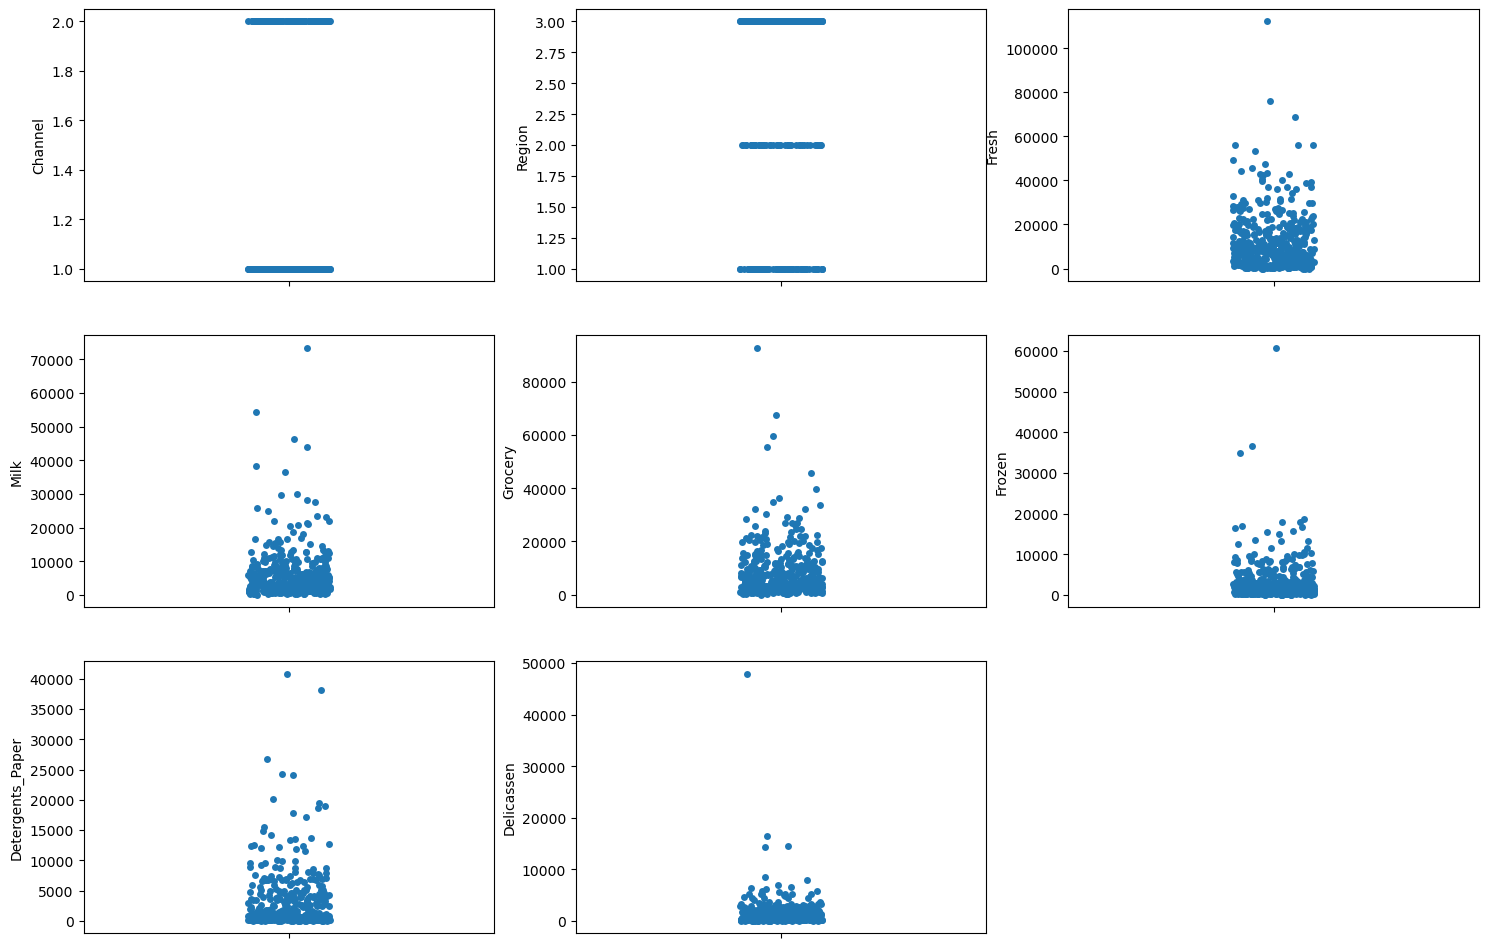

In [559]:
# Creating a function to display strip plots
def strip_plots(dataframe):
    fig, ax = plt.subplots(figsize = (18, 12))
    i = 1

    for c in dataframe.columns:
        plt.subplot(3,3,i)
        sns.stripplot(data=dataframe,y=dataframe[c])
        i += 1

strip_plots(df)

All of the discrete features have significant outliers.  We will drop these by only including values within 2 standard deviations for each feature.

In [560]:
# Creating lists for nominal features and discrete features
col_cat = ['Channel','Region']
col_dis = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [561]:
df_2 = df.copy()

std_devs = 2

for i in col_dis:
        df_2 = df_2[(df_2[i] > df_2[i].mean() - std_devs*df_2[i].std()) & 
                (df_2[i] < df_2[i].mean() + std_devs*df_2[i].std())]

df_2 = df_2.reset_index(drop=True)
df_2.count()

Channel             339
Region              339
Fresh               339
Milk                339
Grocery             339
Frozen              339
Detergents_Paper    339
Delicassen          339
dtype: int64

There are now 339 rows, so 101 rows were dropped

In [562]:
440-339

101

Let's look at the strip plots again to see how the outliers were handled

/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/112048176.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


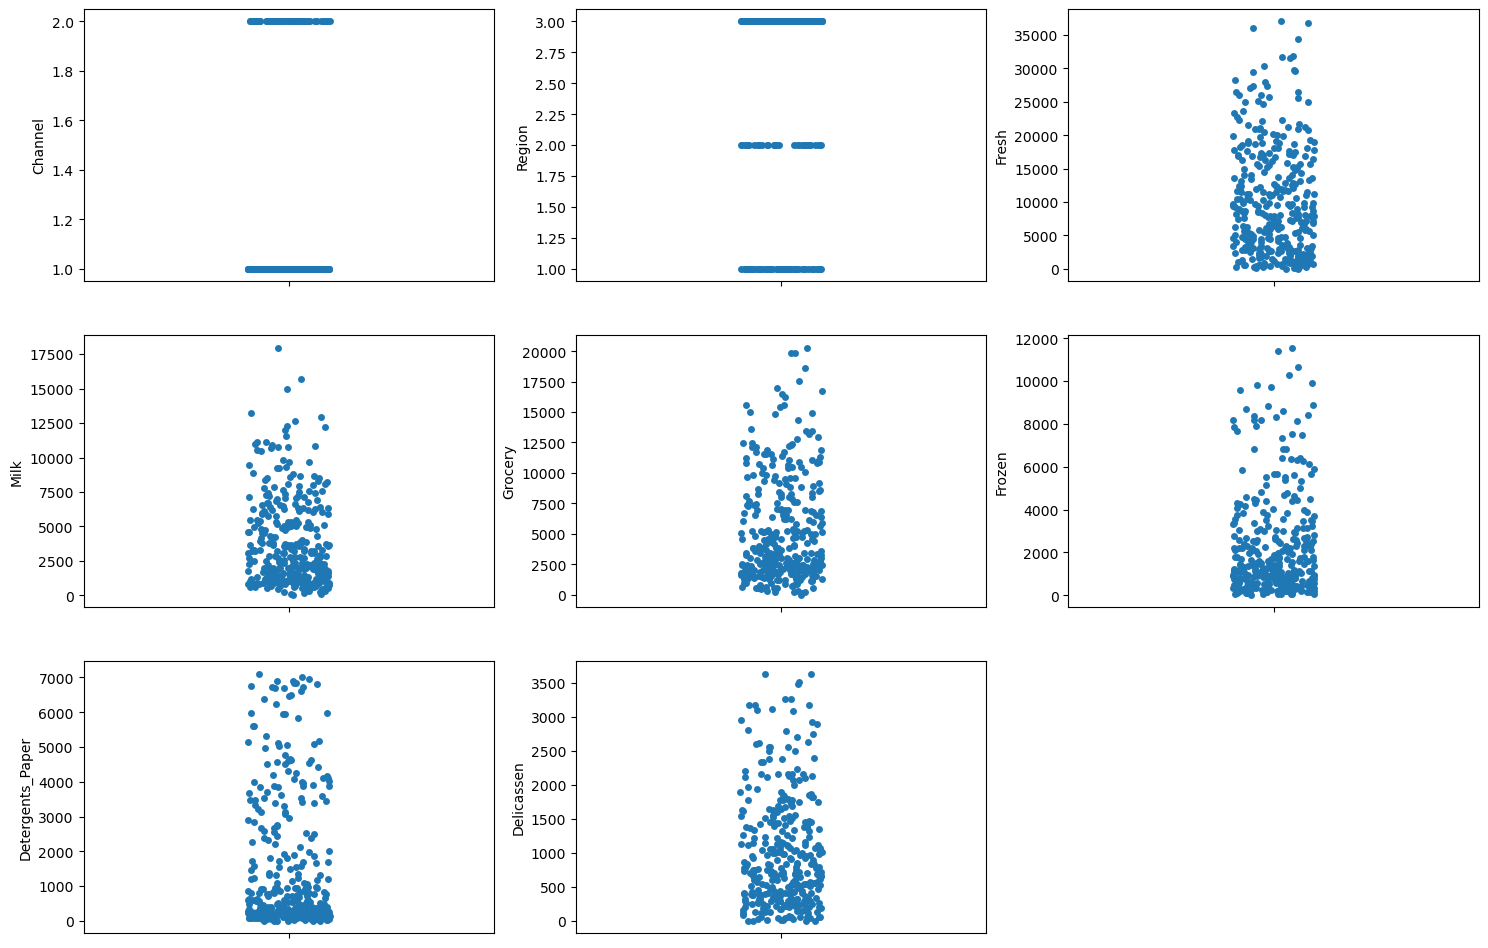

In [563]:
# Displaying new strip plots
strip_plots(df_2)

The outliers have been removed successfully.  Now we can will histograms of each feature to view their new distributions.

/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/3745771473.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


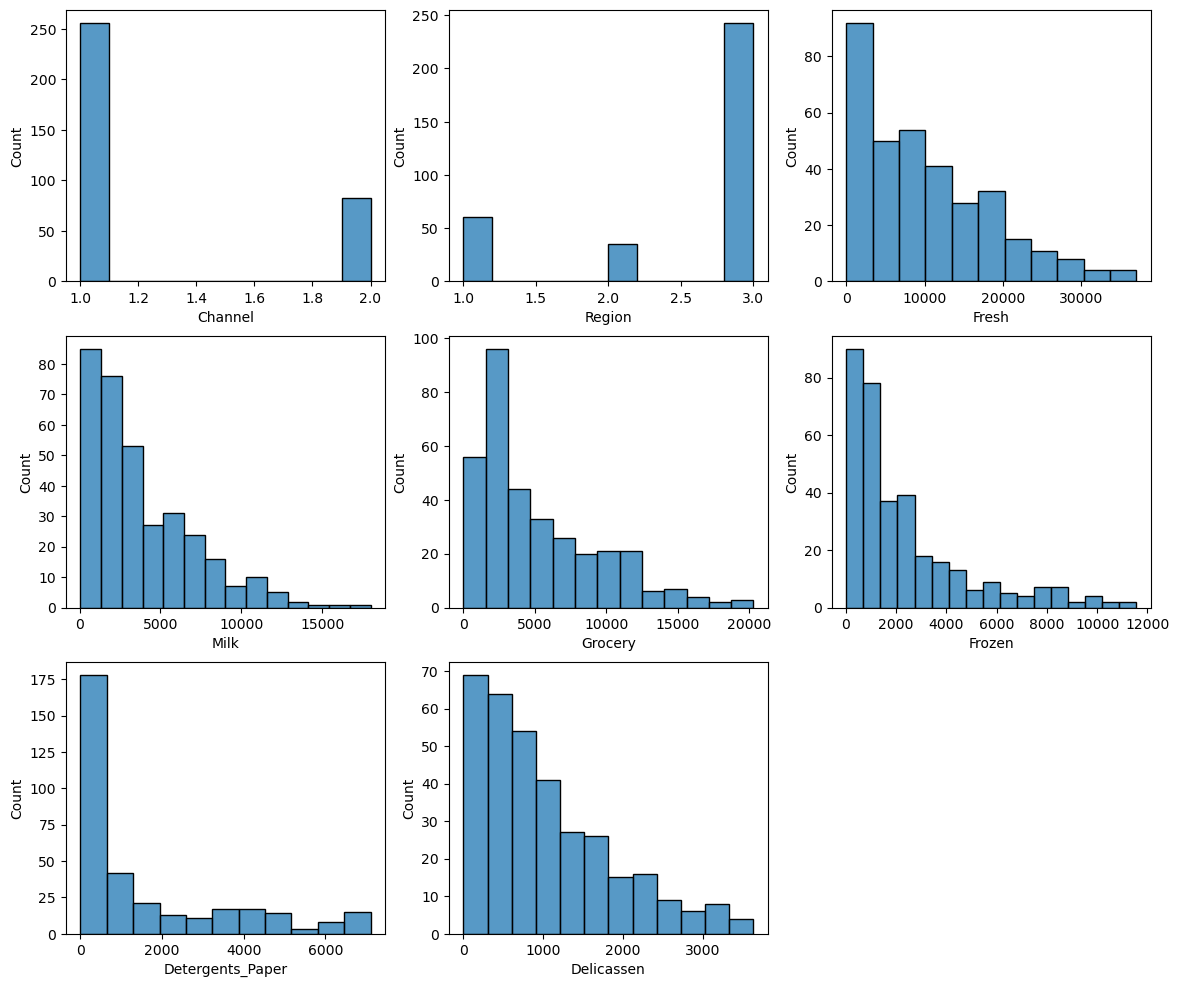

In [564]:
# Plotting histograms of all features
fig, ax = plt.subplots(figsize = (14, 12))
i = 1

for c in df_2.columns:
    plt.subplot(3,3,i)
    sns.histplot(df_2[c])
    i += 1

The Channel and Region channels look to be categorical in type, but it's unclear if they are oridinal or nominal. Is Region 2 better than Region 1? Or just different? For this project we will assume that they are nominal and the order doesn't matter.

The rest of the features are discrete since all values are integers, and also interval type because the distance between the values matters.

Now we will create a correlation heatmap to view the relationship between the features:

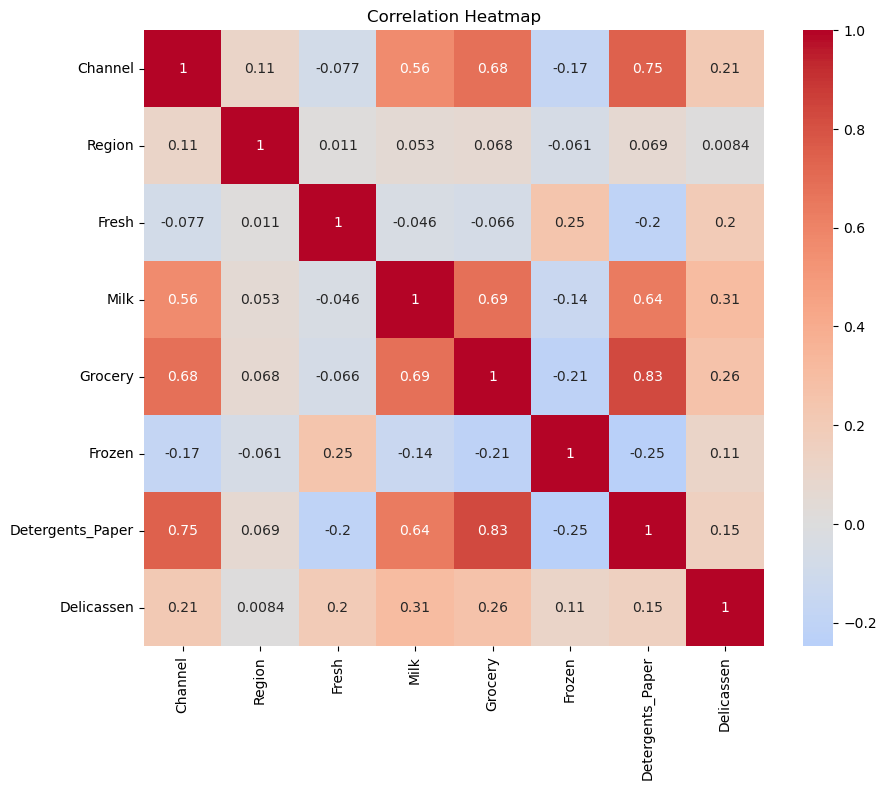

In [565]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

For this project we will consider strong correlations to be above 0.60 or below -0.60.  There are strong correlations between: 

- Grocery and Channel (0.68)
- Grocery and Milk (0.69)
- Grocery and Detergents_Paper (0.83)
- Detergents_Paper and Channel (0.75)
- Detergents_Paper and Milk (0.64)

Let's visualize all correlations:

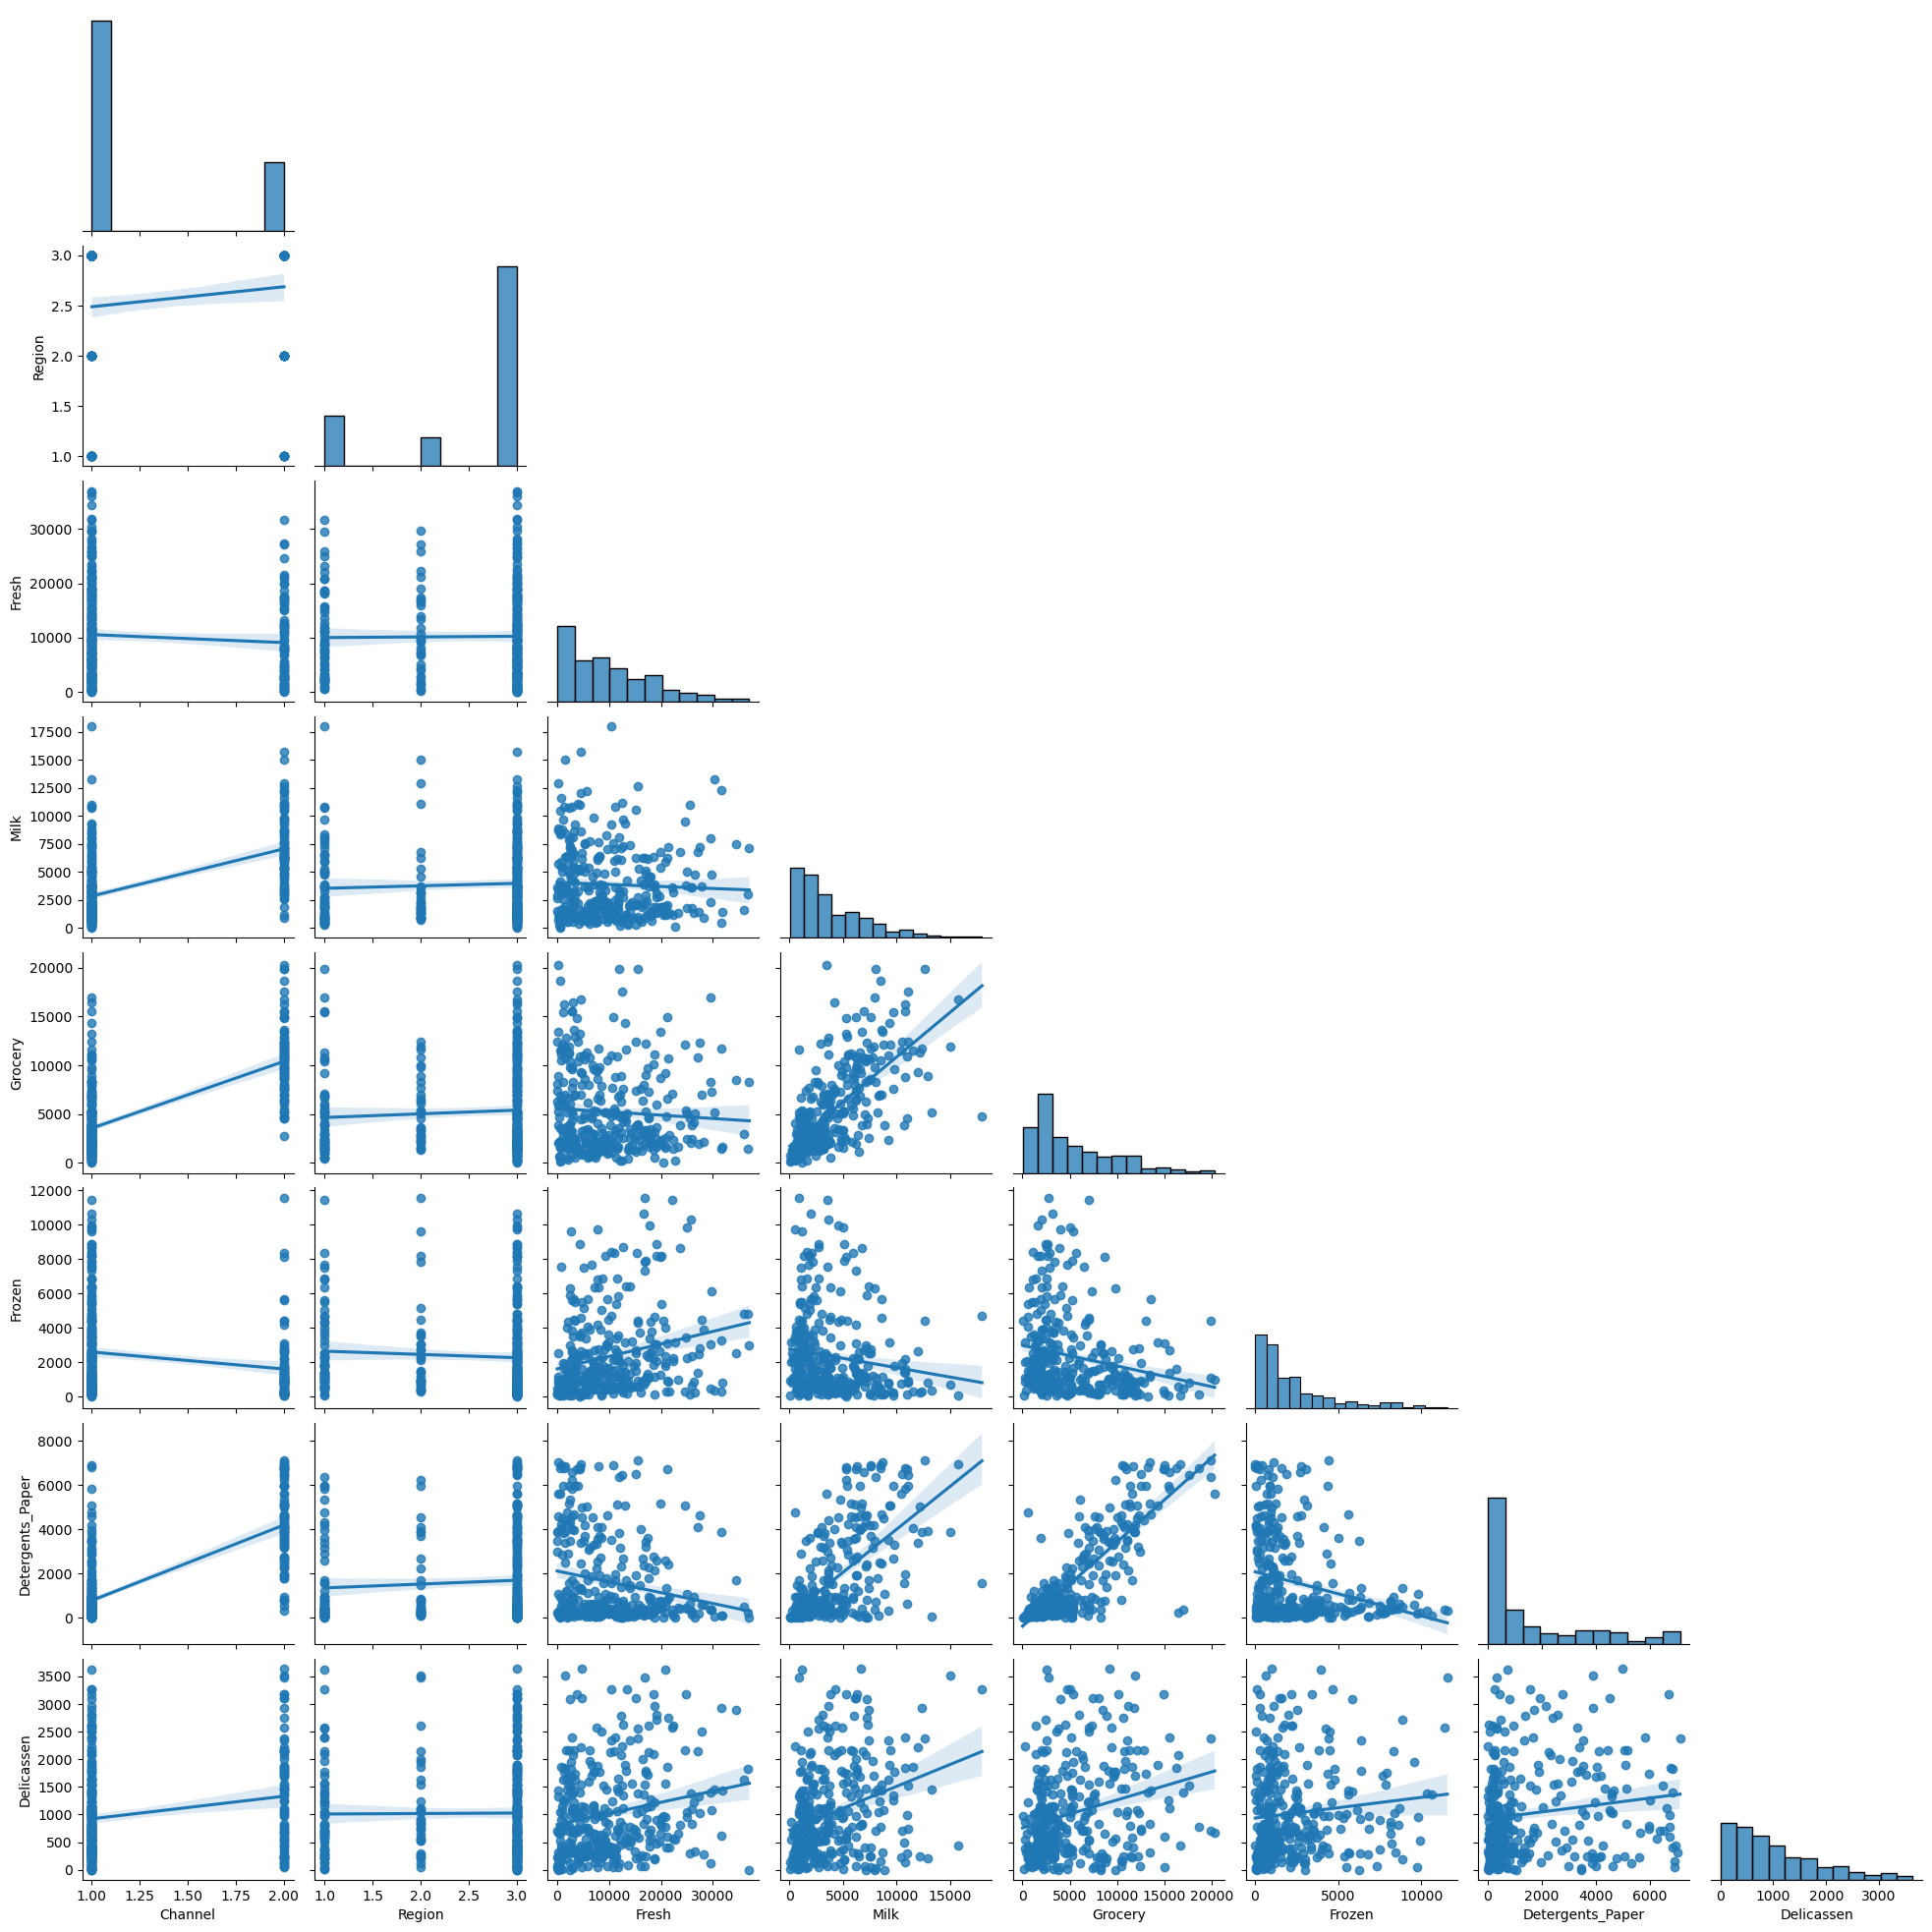

In [566]:
# Using pair plots to visualize the relationship between all variables.
sns.pairplot(data=df_2,corner=True,kind='reg')

Since Detergents_Paper is very highly correlated with Grocery, and highly correlated with Channel and Milk, it is redundant and we can remove it to simplify our models:

In [567]:
df_2 = df_2.drop('Detergents_Paper', axis=1)

Now we need to scale the data since the range varies greatly among the features, and transform all features into a normal distribution.

In [568]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicassen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

To simplify this process we are going to choose only 2 features: Fresh and Frozen.

In [569]:
# Import KMeans
from sklearn.cluster import KMeans

Looking at a scatterplot of Fresh vs Frozen we can see that there may be 2 or 3 clusters, but it's not clear.

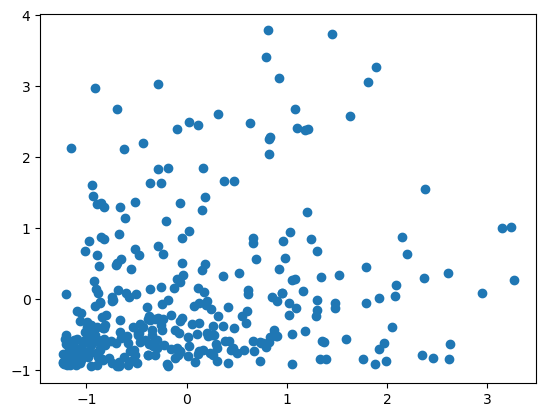

In [570]:
plt.scatter(df_scaled['Fresh'],df_scaled['Frozen'])

Let's assume there are 3 clusters.  

Now we have to find the optimal centroids for each cluster. We will manually create 3 centroids, assign each point to the closest centroid, then recompute the centroids based on the mean of the points in the cluster.  We will repeat this 10 times and see when the centroids converge (inertia stops decreasing)

In [588]:
df_kmeans.head()

,Fresh,Frozen
0,0.302755,-0.873043
1,-0.379419,-0.237044
2,0.375203,1.670133
3,-0.093032,-0.687338
4,0.236750,-0.763756


In [596]:
centroids = pd.DataFrame([[0,3],[-1,-1],[3,0]],columns=['Fresh','Frozen'])

centroids.T[0]

Fresh     0
Frozen    3
Name: 0, dtype: int64

In [603]:
df_kmeans - centroids.T[0]

,Fresh,Frozen
0,0.302755,-3.873043
1,-0.379419,-3.237044
2,0.375203,-1.329867
3,-0.093032,-3.687338
4,0.236750,-3.763756
...,...,...
334,1.329662,-3.850446
335,-0.996317,-3.327842
336,0.796517,-3.678299
337,0.013573,-3.534501


In [611]:
np.sqrt( ( (df_kmeans - centroids.T[0])**2).sum(axis=1))

0      3.884858
1      3.259204
2      1.381783
3      3.688511
4      3.771195
         ...   
334    4.073566
335    3.473785
336    3.763552
337    3.534527
338    4.035547
Length: 339, dtype: float64

In [609]:
#distances = 
centroids.T.apply(lambda x: print(((df_kmeans-x)**2).head()))#np.sqrt((df_kmeans - x)**2).sum(axis=1))  # euclidian distances of every point to each cluster
#distances

ValueError: If using all scalar values, you must pass an index

In [610]:
centroids.T.apply(lambda x: np.sqrt(((df_kmeans - x)**2).sum(axis=1))) 

,0,1,2
0,3.884858,1.308927,2.835019
1,3.259204,0.983475,3.387722
2,1.381783,3.003463,3.111094
3,3.688511,0.959348,3.168482
4,3.771195,1.259111,2.866858
...,...,...,...
334,4.073566,2.334458,1.874376
335,3.473785,0.672168,4.009742
336,3.763552,1.825093,2.305521
337,3.534527,1.115356,3.033882


/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/1830206355.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)
/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/1830206355.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['label'] = labels


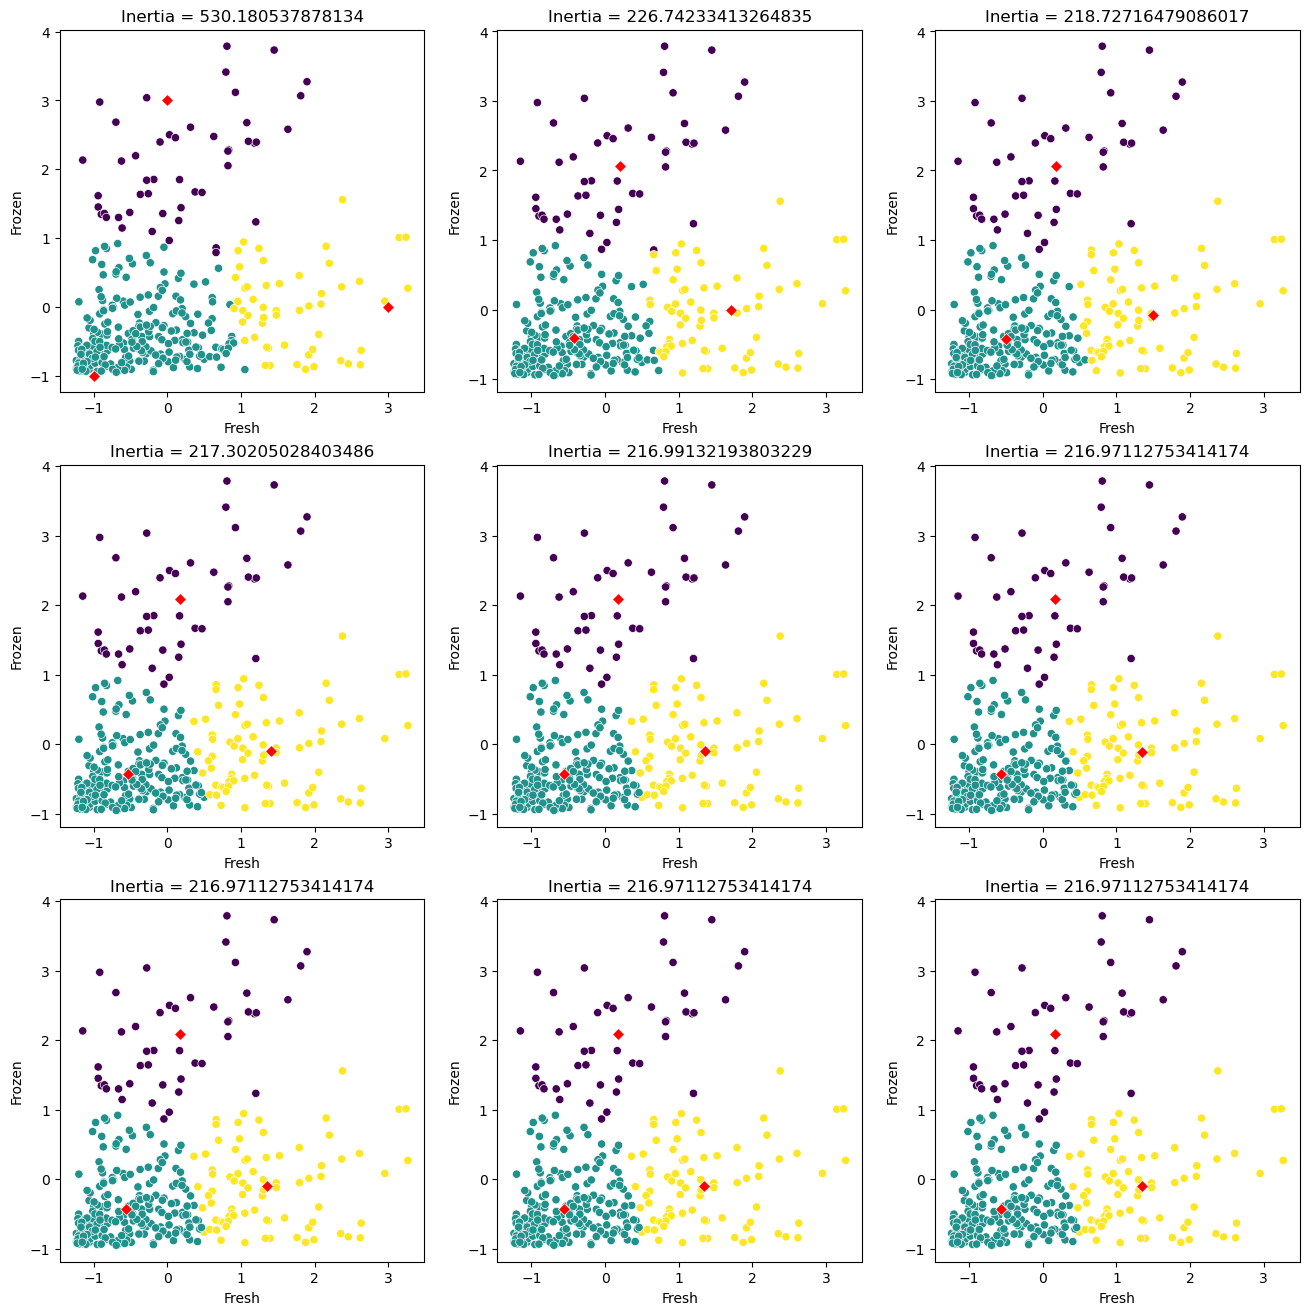

In [613]:
df_kmeans = df_scaled[['Fresh','Frozen']]

# Manually creating the initial centroids
centroids = pd.DataFrame([[0,3],[-1,-1],[3,0]],columns=['Fresh','Frozen'])
#centroids = pd.DataFrame([[ 0.17287347,  2.09043498],[ 1.3449413 , -0.10544562],[-0.56385828, -0.42668525]],columns=['Fresh','Frozen'])

fig, ax = plt.subplots(figsize = (16, 16))

for i in range(1,10):
    distances = centroids.T.apply(lambda x: np.sqrt(((df_kmeans - x)**2).sum(axis=1)))  # euclidian distances of every point to each cluster
    labels = distances.idxmin(axis=1)  # assigning each point to the closest centroid
    inertia = (distances.min(axis=1)**2).sum()  # calculating the inertia
    
    plt.subplot(3,3,i)
    sns.scatterplot(x = df_kmeans['Fresh'], y = df_kmeans['Frozen'], c = labels)  # plotting the clusters
    sns.scatterplot(x = centroids['Fresh'], y = centroids['Frozen'], c = 'red', marker = 'D')  # plotting the centroids
    plt.title(f'Inertia = {inertia}')
    
    df_kmeans['label'] = labels

    # Recomputing the centroids
    centroids = df_kmeans.groupby('label').apply(lambda x: x.mean()).iloc[:,:2]
    
    df_kmeans = df_kmeans.drop('label',axis=1)

The centroids look to converge after 5 iterations, and the final value for inertia is 367.74

In [614]:
# Final centroids
centroids

,Fresh,Frozen
label,,
0,0.172873,2.090435
1,-0.563858,-0.426685
2,1.344941,-0.105446


There is an easier way of finding the centroids by using the KMeans function

In [615]:
k = 3  # number of clusters 
n_init = 10  # number of iterations
random_state = 0

km = KMeans(n_clusters = k, init = 'random', n_init = n_init, random_state = random_state)
km.fit(df_kmeans)
new_centroids = km.cluster_centers_
new_centroids

array([[ 0.17287347,  2.09043498],
       [ 1.3449413 , -0.10544562],
       [-0.56385828, -0.42668525]])

The centroids using the KMeans function are very similar to the centroids we found earlier.  Let's compare the inertia:

In [551]:
km.inertia_

216.97112753414171

The inertia is also very similar.  Let's try plotting the new clusters to see how they compare to the clusters we made earlier:

Text(0.5, 1.0, 'Inertia = 216.97112753414171')

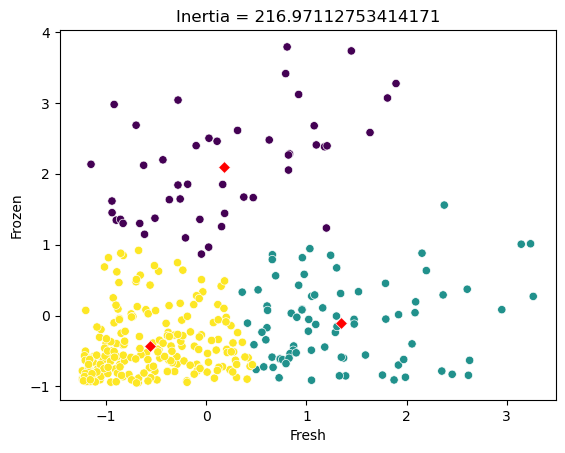

In [522]:
sns.scatterplot(x = df_kmeans['Fresh'], y = df_kmeans['Frozen'], c = km.labels_)  # plotting the clusters
sns.scatterplot(x = new_centroids[:,0], y = new_centroids[:,1], c = 'red', marker = 'D')  # plotting the centroids
plt.title(f'Inertia = {km.inertia_}')

These clusters look better, but there is still one data point that looks to be assigned to the wrong cluster.  

Now let's try to confirm that we chose the optimal value for K.  We can get a better sense of the optimal value for K by creating a function that iterates through different values of K and returns the calculated inertia.

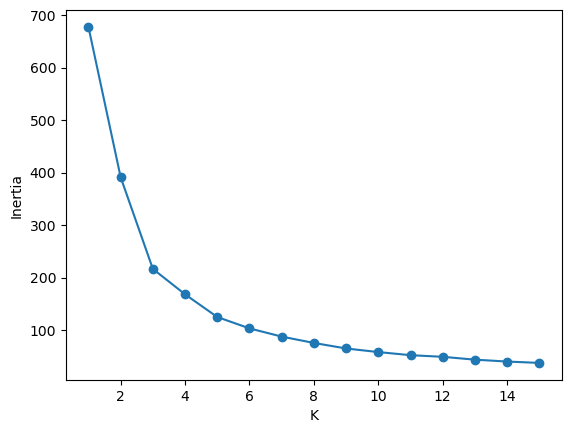

In [523]:
def optimal_k(dataframe, max_k):
    k_values = []
    inertia_values = []

    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters = i, n_init=10)
        kmeans.fit(dataframe)

        k_values.append(i)
        inertia_values.append(kmeans.inertia_)
    
    plt.plot(k_values, inertia_values, 'o-')
    plt.xlabel('K')
    plt.ylabel('Inertia')

optimal_k(df_kmeans, 15)


To determine the optimal value of K, we want to minimize both the inertia and the value of K for simplicity's sake.  We can do this by looking for the 'elbow' in the plot above, and this occurs when K = 3.

A value of K = 3 gives us an inertia of:

In [329]:
kmeans.inertia_

216.9383741608106

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [324]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [325]:
df_hc = df_scaled[['Fresh','Frozen']]

Printing the Dendogram to help us determine the optimal value for K

In [326]:
# Defining the plot_dendrogram function
def plot_dendrogram(dataframe,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(dataframe, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

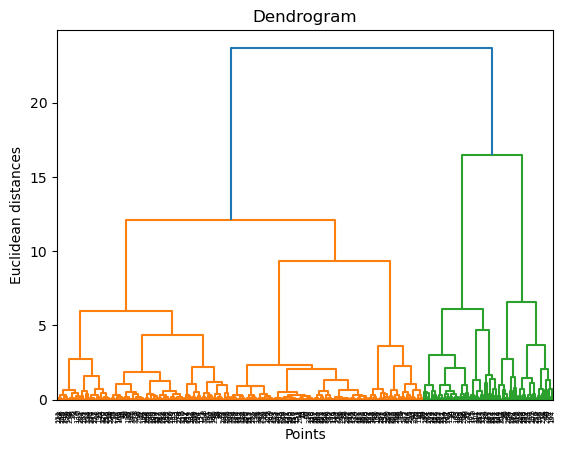

In [327]:
plot_dendrogram(df_hc)

When using a dendrogram to determine the optimal number of clusters, we try to find the longest vertical distance between junctions, and draw a horizontal line intersecting the branches.  The number of branches intersected is the optimal number of clusters.  For this diagram, it looks like 2 is the optimal value for K, and 3 would be slightly less optimal.  Let's choose K = 3 for this model so that we can compare it to the results of the KMeans model.

The other thing we must consider is the linkage criteria to use (single, complete, or average). We will build models for all three and evaluate which criteria gives us the best results.

In [546]:
n_clusters = 3

# Single
single = AgglomerativeClustering(n_clusters = n_clusters, linkage="single")
single_pred = single.fit_predict(df_hc)

# Complete
complete = AgglomerativeClustering(n_clusters = n_clusters, linkage="complete")
complete_pred = complete.fit_predict(df_hc)

# Average
avg = AgglomerativeClustering(n_clusters = n_clusters, linkage="average")
avg_pred = avg.fit_predict(df_hc)

Let's plot the results to evaluate the models 

/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_56392/3416842287.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i+1)


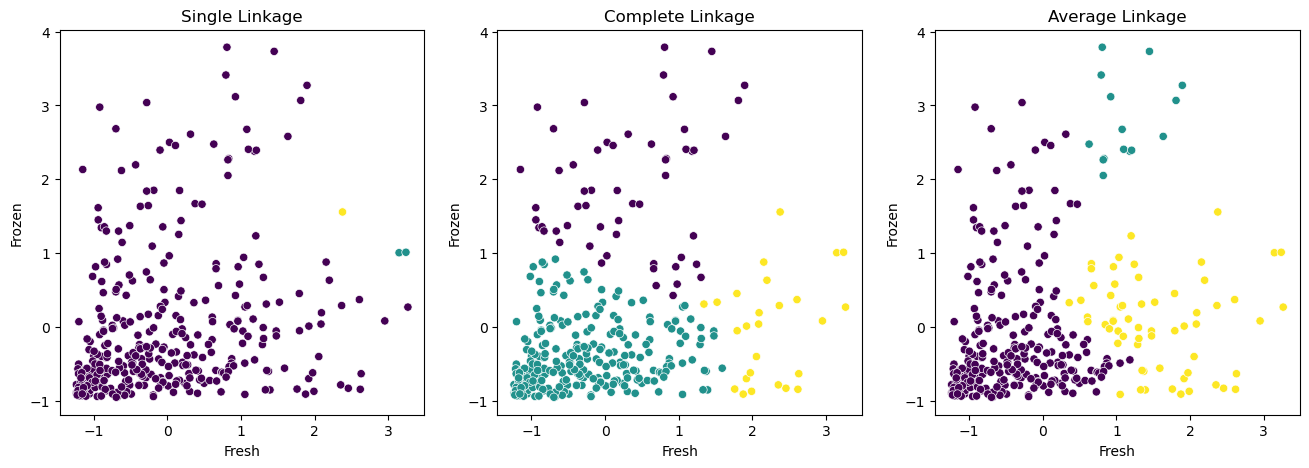

In [547]:
fig, ax = plt.subplots(figsize = (16, 5))

labels = [single_pred, complete_pred, avg_pred]
titles = ['Single Linkage', 'Complete Linkage', 'Average Linkage']

for i in range(3):
    
    plt.subplot(1,3,i+1)
    sns.scatterplot(x = df_kmeans['Fresh'], y = df_kmeans['Frozen'], c = labels[i])  # plotting the clusters
    plt.title(titles[i])

Based on looking at these models, single linkage gives us the worst result.  Complete linkage gives us the most similar result to KMeans, but there is still a small cluster of data points highlighted in purple that should probably be highlighted in yellow.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.